In [1]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('/home/myoui/shared/ML/gene_list_para.csv')

In [3]:
label_encoder = LabelEncoder()
df['gene_type_encoded'] = label_encoder.fit_transform(df['gene_type'])
y = df['gene_type_encoded']

In [4]:
scaler = MinMaxScaler()
df['mfe_scaled'] = scaler.fit_transform(df[['mfe']])

In [5]:
df

,transcript_id,ensembl_id,chromosome_location,gene_type,gene_symbol,sequence,gc_content,seq_length,structure,mfe,dot_count,bracket_count,kmers,gene_type_encoded,mfe_scaled
0,ENST00000707457.1,ENSG00000291414.1,scaffold:GRCh38:HG1369_PATCH:55354:55416:-1,miRNA,MIR4740,GCCAAGGACTGATCCTCTCGGGCAGGGAGTCAGAGGGGACCGCCCG...,0.682540,63,..((.((((.(((((((((((((.((...((....))..)))))))...,-37.4,17,46,gccaag ccaagg caagga aaggac aggact ggactg gact...,1,0.988977
1,ENST00000707458.1,ENSG00000291415.1,scaffold:GRCh38:HG1369_PATCH:107309:107393:-1,miRNA,MIR3186,AGCCTGCGGTTCCAACAGGCGTCTGTCTACGTGGCTTCAACCAAGT...,0.564706,85,(((((..((((((((.((.(((((.(((.((((((((.(((...))...,-44.9,17,68,agcctg gcctgc cctgcg ctgcgg tgcggt gcggtt cggt...,1,0.985960
2,ENST00000637028.1,ENSG00000283344.1,scaffold:GRCh38:HG1362_PATCH:80950:81034:1,miRNA,MIR1244-4,ATCTTATTCCGAGCATTCCAGTAACTTTTTTGTGTATGTACTTAGC...,0.317647,85,(((((((.....(((..((((..(((......((((.((((........,-15.0,35,50,atctta tcttat cttatt ttattc tattcc attccg ttcc...,1,0.997989
3,ENST00000711167.1,ENSG00000292346.1,chromosome:GRCh38:Y:2609191:2609254:1,miRNA,MIR6089,CCCCGGGCCCGGCGTTCCCTCCCCTTCCGTGCGCCAGTGGAGGCCG...,0.843750,64,(((((..((((.(.(.((((..(((((..((...))..)))))..)...,-34.6,20,44,ccccgg cccggg ccgggc cgggcc gggccc ggcccg gccc...,1,0.990104
4,ENST00000711140.1,ENSG00000292355.1,chromosome:GRCh38:Y:1293918:1293992:1,miRNA,MIR3690,CCCATCTCCACCTGGACCCAGCGTAGACAAAGAGGTGTTTCTACTC...,0.533333,75,(((((((.(((.(((..((((.(((((....(((.........)))...,-32.8,25,50,cccatc ccatct catctc atctcc tctcca ctccac tcca...,1,0.990828
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9290,ENST00000662321.1,ENSG00000177788.7,chromosome:GRCh38:1:229267157:229271051:-1,lncRNA,RAB4A-AS1,GGGCGGGGCGCGTGAGGACTTCGGCGCGCGCCGGAAGCACGTGCGC...,0.435714,2520,.(((..((((((((..(....)..))))))))(((((((.(((.((...,-784.5,926,1594,gggcgg ggcggg gcgggg cggggc ggggcg gggcgc ggcg...,0,0.688430
9291,ENST00000689196.1,ENSG00000231028.12,chromosome:GRCh38:6:135497944:135528351:1,lncRNA,AHI1-DT,AGGGGGCTCCCGCCTCCCCGGCCACGCGAGCGGGAACAGTCTCCTC...,0.398104,1055,.((((((....))))))..(((((..((((.((((......))))....,-249.8,451,604,aggggg gggggc ggggct gggctc ggctcc gctccc ctcc...,0,0.903532
9292,ENST00000820942.1,ENSG00000248538.11,chromosome:GRCh38:8:9151725:9202973:1,lncRNA,PPP1R3B-DT,AGCGCGCCCGGAGTGATCCGGCTGCGGGCCAGGGTCTGGGAAGGGG...,0.499084,1092,.((.((((((((....)))))..))).))((((((((((((.((((...,-335.1,474,618,agcgcg gcgcgc cgcgcc gcgccc cgcccg gcccgg cccg...,0,0.869217
9293,ENST00000648393.1,ENSG00000285666.2,chromosome:GRCh38:7:76818377:76903041:-1,lncRNA,description:novel,TTCTGTTTTTTTTTCTCTCCCACCCATCCTTATTGCCAACCACCCC...,0.412121,1155,((((((((.....(((((...((((.(((((.((.(((.......(...,-290.3,457,698,ttctgt tctgtt ctgttt tgtttt gttttt tttttt tttt...,0,0.887240


In [6]:
# Feature extraction: Select relevant columns and k-mer text data
X_numerical = df[['gc_content', 'seq_length', 'dot_count', 'bracket_count', 'mfe_scaled']]
kmers_text = df['kmers']

In [7]:
# Vectorize k-mers using CountVectorizer
vectorizer = CountVectorizer()
X_kmers = vectorizer.fit_transform(kmers_text)

In [8]:
# Convert k-mer matrix to a DataFrame and reset index to merge with X_numerical
X_kmers_df = pd.DataFrame(X_kmers.toarray(), columns=vectorizer.get_feature_names_out())
X_kmers_df.reset_index(drop=True, inplace=True)

In [9]:
X = pd.concat([X_numerical.reset_index(drop=True), X_kmers_df], axis=1)

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [12]:
y_pred = clf.predict(X_test)

In [13]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.98      0.99       418
           1       0.87      0.98      0.92       388
           2       0.96      0.92      0.94       479
           3       0.97      0.97      0.97       376
           4       0.92      0.80      0.85       198

    accuracy                           0.94      1859
   macro avg       0.94      0.93      0.93      1859
weighted avg       0.95      0.94      0.94      1859



In [14]:
conf_matrix = confusion_matrix(y_test, y_pred)

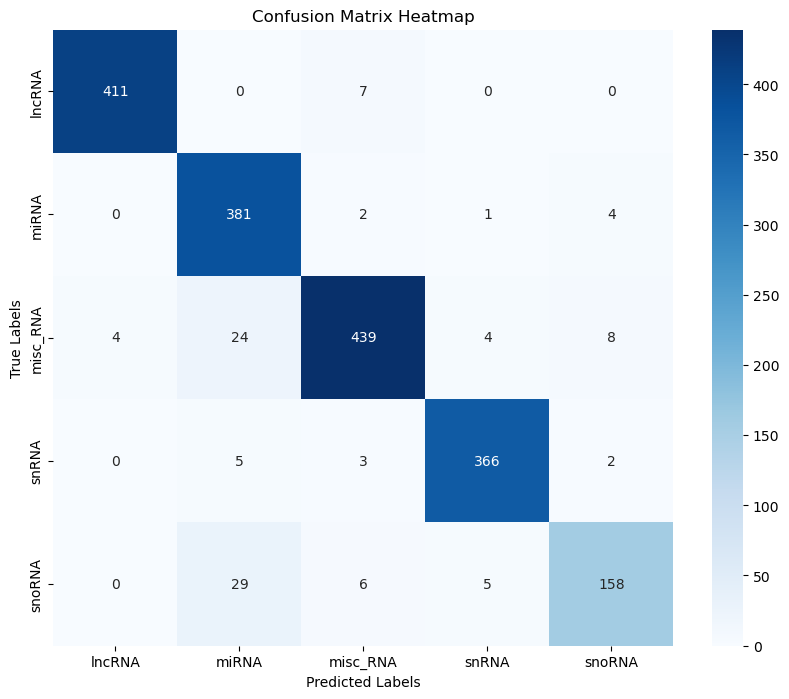

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title("Confusion Matrix Heatmap")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()